# **Heart Disease Project Based on Decision Tree Model**

**Our Objective:**
   
   Here we are going to work on the medical dataset, we have a list of features of a patient or you can say a list of testing reports so our objective is to find out whether the patient has heart disease or not.

**Steps:**

1.   We read the dataset
2.   Apply EDA on the dataset
3.   Visualize the data
4.   Remove outlayer using box plot
5.   Build the Model
6.   Predict the model
7.   Predict the model with the coming patent


**About Dataset**

**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise. exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest. slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

**target**: the presence of heart disease in the patient (0 = no disease, 1 = disease present).

# **Import required libraries**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
data=pd.read_csv('/content/drive/MyDrive/Intellipaath Dataset/Heart Disease/heart1.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


# **Apply Basic EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# average ages of a patient is 54.36
# and max agaes is 77

In [ ]:
data.shape

(303, 13)

In [ ]:
data.duplicated().sum()
# in inteare data we have one row intire duplicated row

1

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [ ]:
# if you want to see the row which content duplicate

In [ ]:
data[data.duplicated()]
# this row have dublicate data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,1


In [ ]:
# so we drop this duplicate row using drop_duplicated() function

In [ ]:
data.drop_duplicates(inplace=True)
# it remove all duplicate rows

In [ ]:
# Now checking we have duplicate row or not

In [ ]:
data.duplicated().sum()

0

In [ ]:
# now we dedect the outlayers

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target'],
      dtype='object')

In [ ]:
# we apply loop to check the outlayer using box-plot

In [ ]:
data.cp.value_counts()
# so we can say it is a categorical column

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

# **Remove Outlayers**

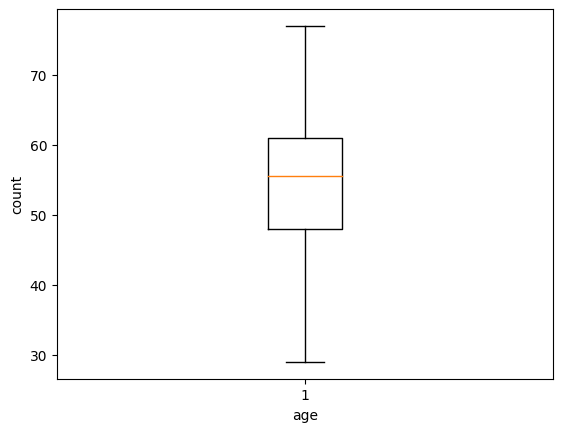

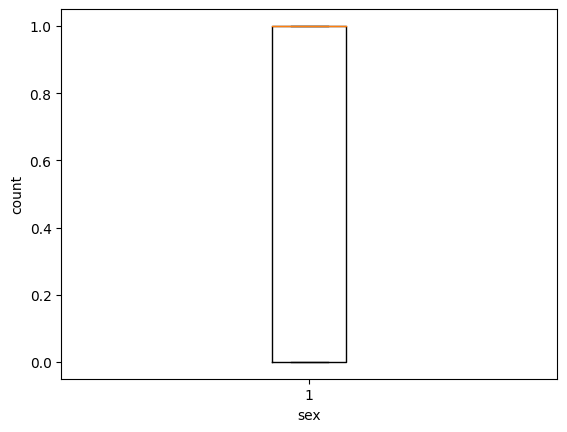

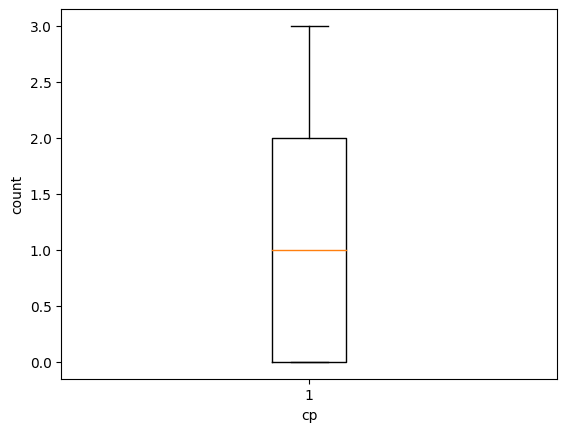

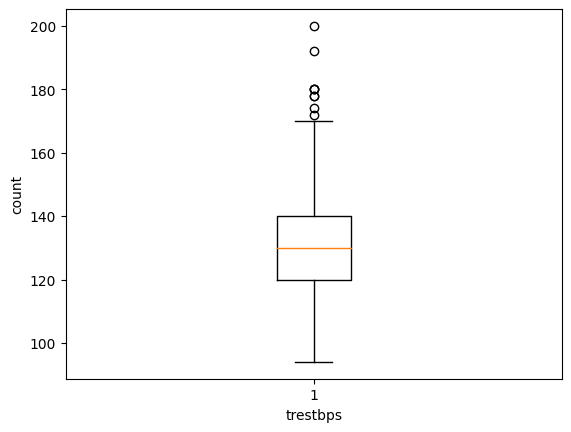

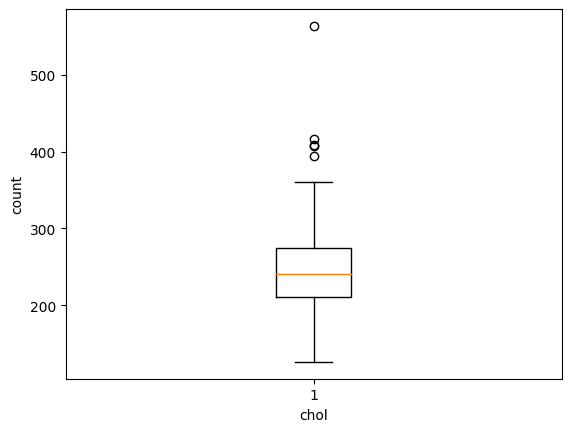

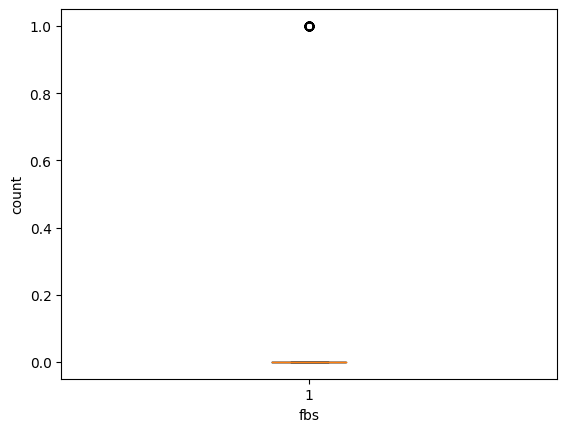

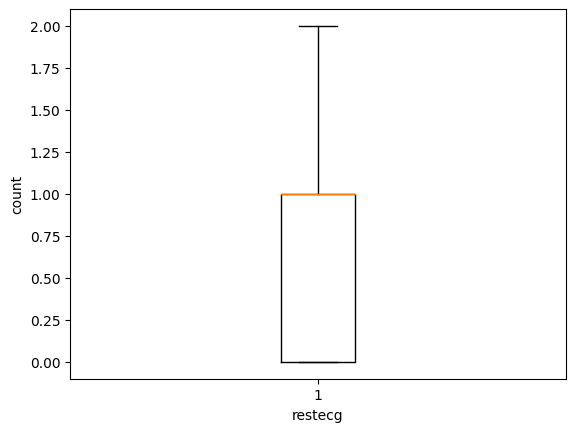

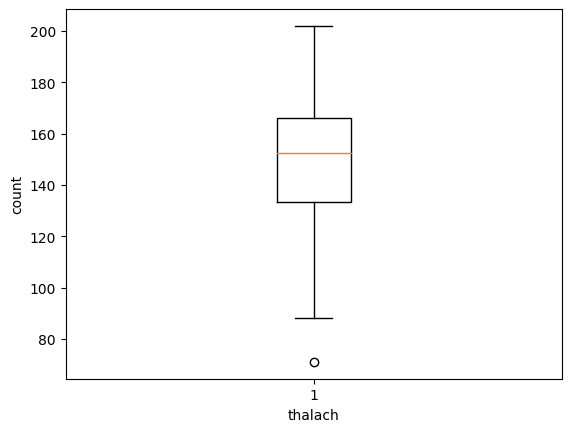

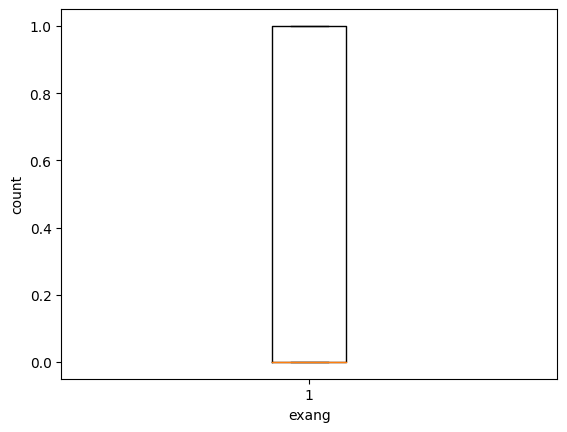

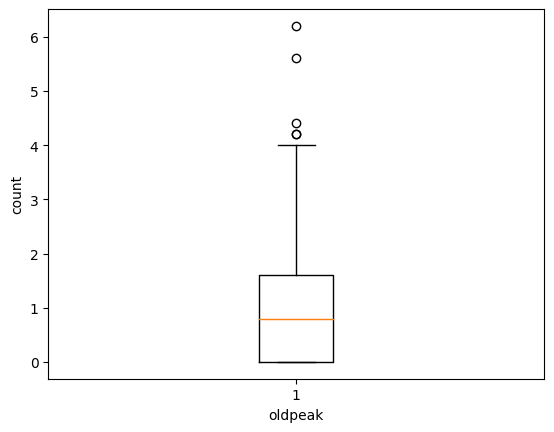

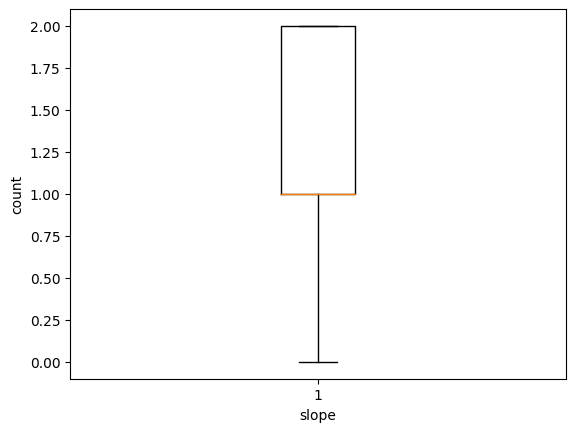

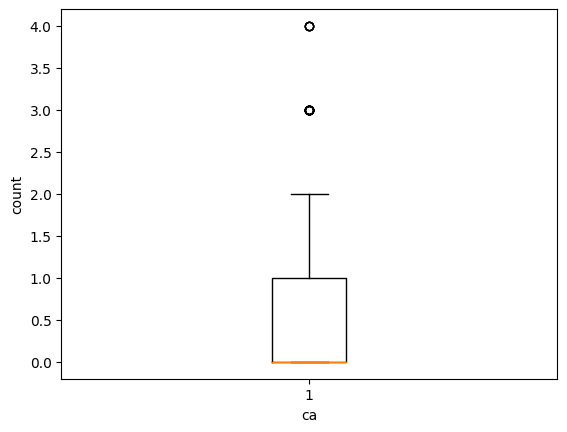

In [ ]:
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'target')):
    plt.boxplot(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [ ]:
cols_outlayes = ['trestbps','chol','fbs','thalach','oldpeak','ca']
cols_outlayes

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

In [ ]:
cols_outlayes

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

In [ ]:
data.quantile(0.25)

age          48.00
sex           0.00
cp            0.00
trestbps    120.00
chol        211.00
fbs           0.00
restecg       0.00
thalach     133.25
exang         0.00
oldpeak       0.00
slope         1.00
ca            0.00
target        0.00
Name: 0.25, dtype: float64

In [ ]:
# flow of removal outlayers
# but we apply loop for this
# q1 = data['trestbps'].quantile(0.25)
# q3 = data['trestbps'].quantile(0.75)
# IQR = q3 - q1
# UW = q3 + 1.5*IQR
# LW = q1 - 1.5*IQR
# data= data[((data['trestbps'] >= LW ) & (data['trestbps'] <= UW ))]

In [ ]:
for i in cols_outlayes:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  IQR = q3 - q1
  UW = q3 + 1.5*IQR
  LW = q1 - 1.5*IQR
  data= data[((data[i] >= LW ) & (data[i] <= UW ))]

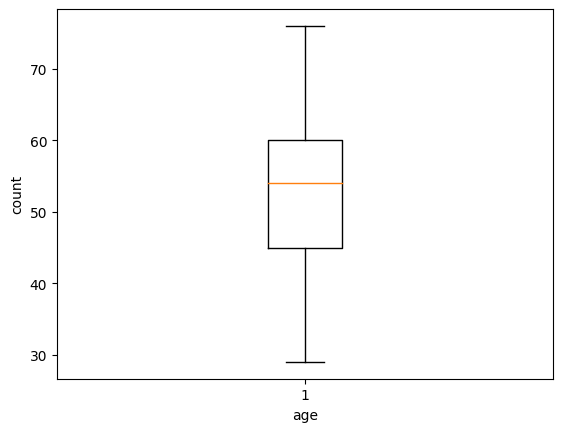

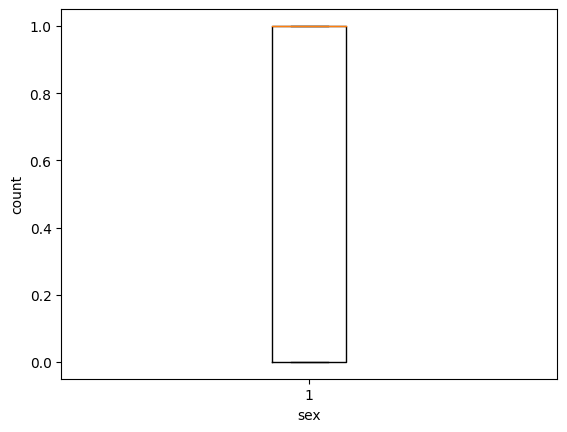

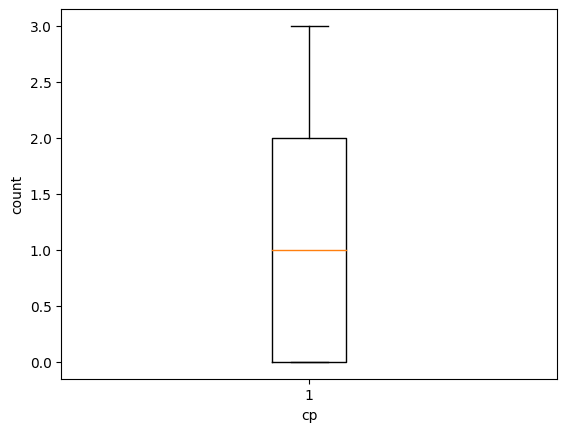

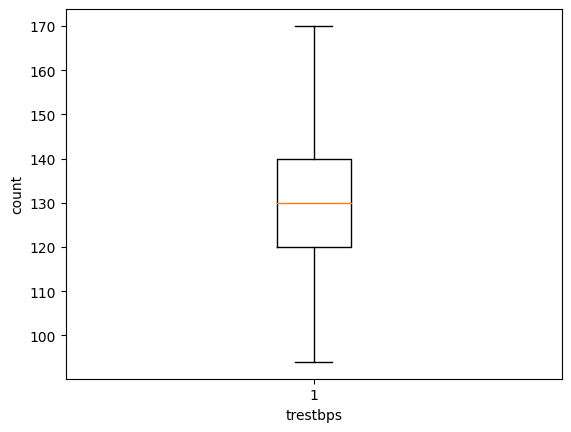

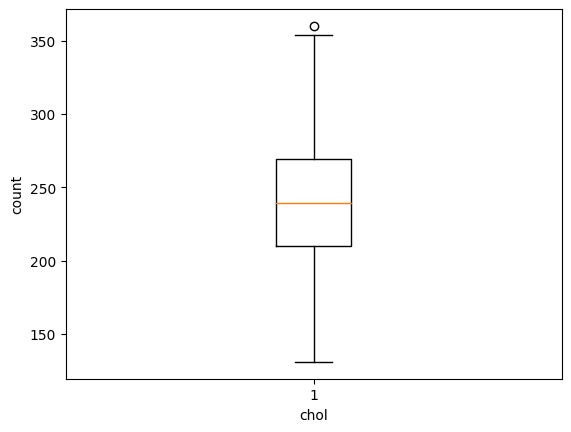

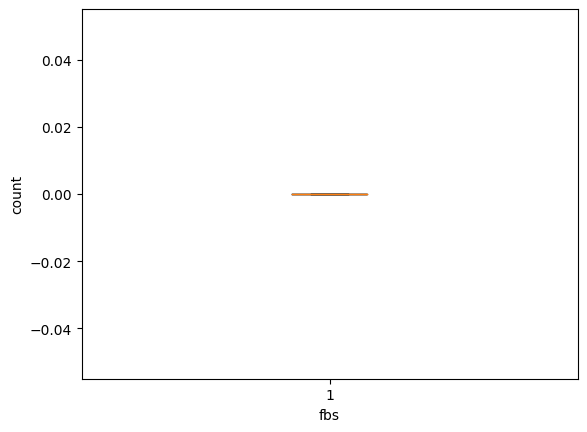

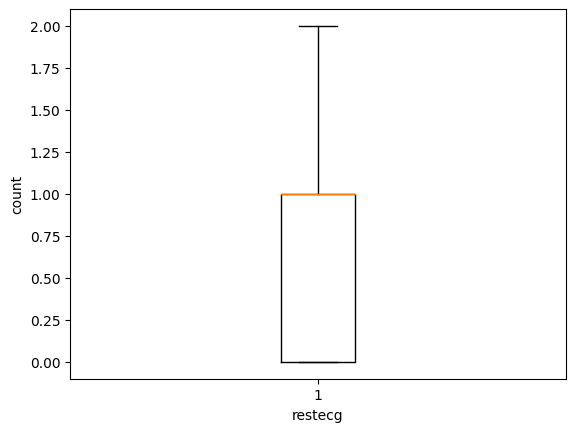

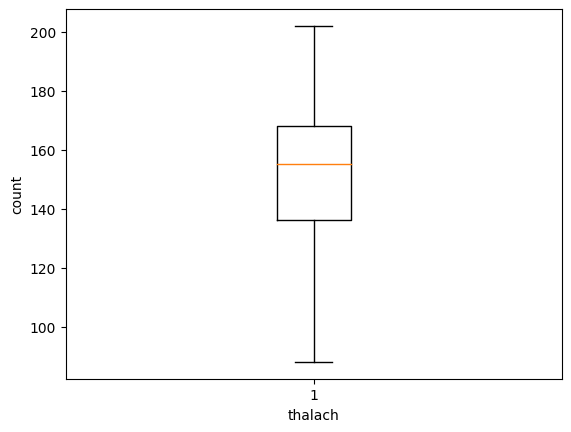

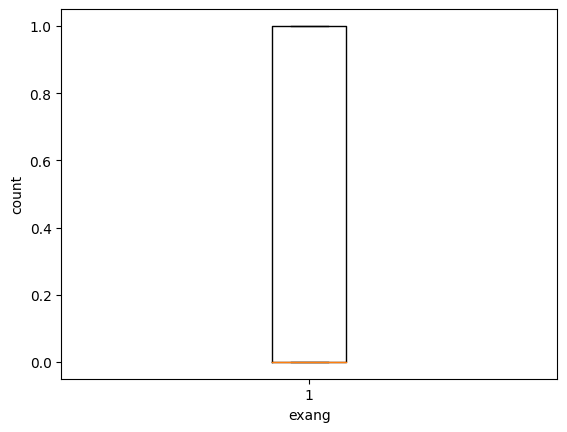

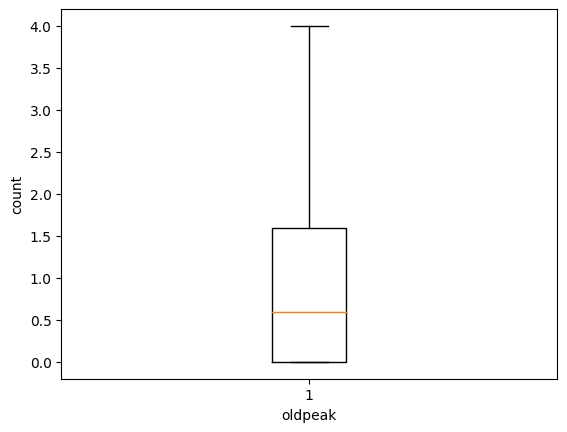

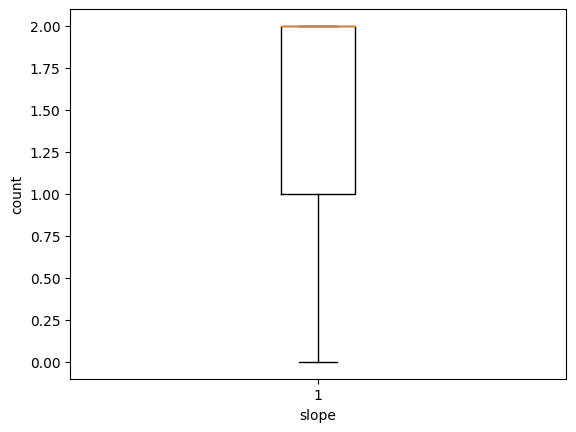

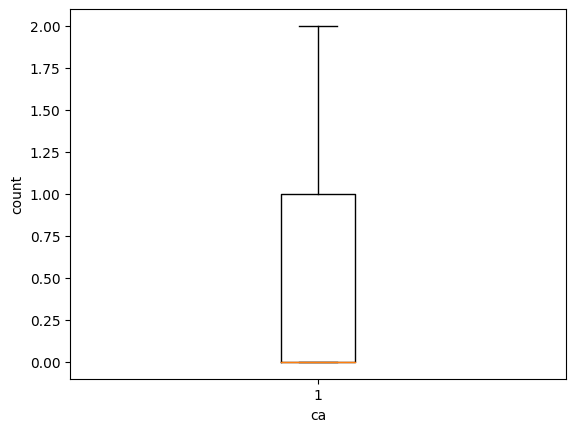

In [ ]:
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'target')):
    plt.boxplot(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

# **Splitting the Data**

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [ ]:
y

,target
1,1
2,1
3,1
4,1
5,1
...,...
296,0
298,0
299,0
301,0


# **Building the Model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [ ]:
print('Shape of X_train.shape :',X_train.shape)
print('Shape of X_test.shape :',X_test.shape)
print('Shape of y_train.shape :',y_train.shape)
print('Shape of y_test.shape :',y_test.shape)

Shape of X_train.shape : (183, 12)
Shape of X_test.shape : (46, 12)
Shape of y_train.shape : (183, 1)
Shape of y_test.shape : (46, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = dt_model.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0])

In [ ]:
pd.DataFrame(y_predict,columns=['y_predict'])

,y_predict
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,0
9,1


In [ ]:
y_test

,target
194,0
57,1
18,1
22,1
143,1
135,1
74,1
177,0
192,0
81,1


# **Check the Accuracy of the Model**

In [ ]:
# from sklearn.metrics import *

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('accuracy_score is :', accuracy_score(y_test,y_predict))


accuracy_score is : 0.7391304347826086


In [ ]:
print('confusion_matrix is :', confusion_matrix(y_test,y_predict))

confusion_matrix is : [[14  9]
 [ 3 20]]


In [ ]:
(21+12)/(12+9+4+21)
# Accuraccy

0.717391304347826

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70        23
           1       0.69      0.87      0.77        23

    accuracy                           0.74        46
   macro avg       0.76      0.74      0.73        46
weighted avg       0.76      0.74      0.73        46



**Question**: if any patent comes that all the testing reports as above features, so predict they have heart disease problem or not ?

# **Predict the model for the coming patent**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
new_patinet = [[50,1,0,120,120,1,1,100,0,1.3,0,1]]
# we make this data as 2D data

In [ ]:
result = dt_model.predict(new_patinet)
if(result[0] == 1):
  print('Patient have heart deasies')
else:
  print('Patient have not heart deasies')

Patient have not heart deasies


In [ ]:
##======== End the project==========##